In [34]:
import pandas as pd

In [40]:
df = pd.read_csv("C:\\Users\\uw\\Downloads\\house_price.csv")

In [42]:
print(df.head())

                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250  


In [44]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB
None


In [46]:
print(df.isnull().sum())

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64


In [48]:
print(df.describe())

         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000      3.000000    120.000000      3.000000    7.317000e+03
max    52272.000000     40.000000   3600.000000     43.000000    1.200000e+07


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

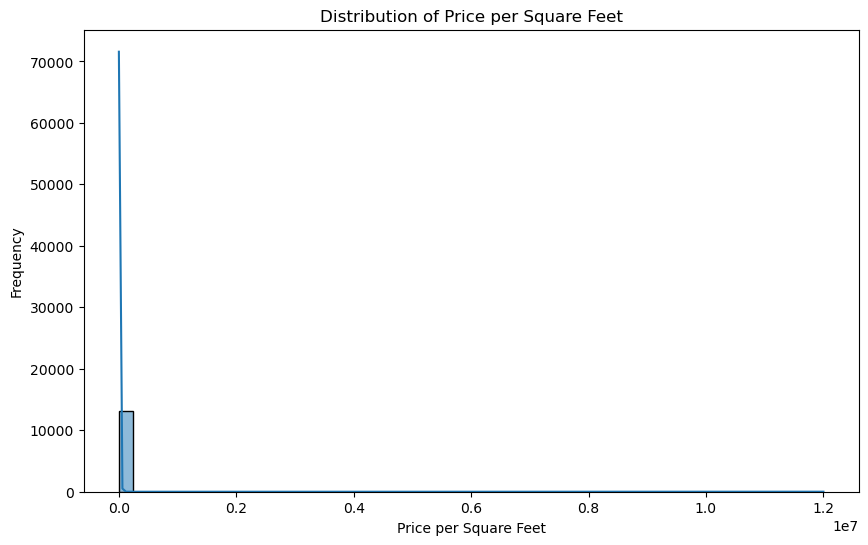

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft'], bins=50, kde=True)
plt.title('Distribution of Price per Square Feet')
plt.xlabel('Price per Square Feet')
plt.ylabel('Frequency')
plt.show()

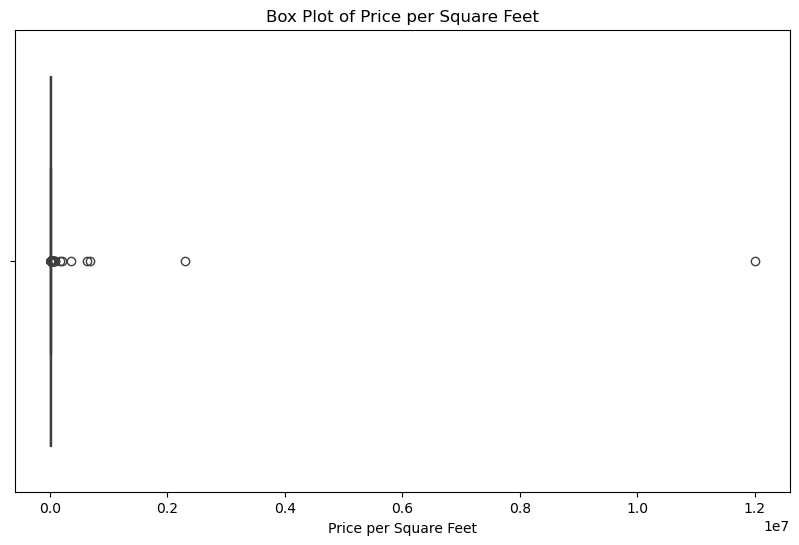

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price_per_sqft'])
plt.title('Box Plot of Price per Square Feet')
plt.xlabel('Price per Square Feet')
plt.show()

In [58]:
mean = df['price_per_sqft'].mean()
std_dev = df['price_per_sqft'].std()

In [60]:
threshold = 3

In [62]:
outliers = df[(df['price_per_sqft'] < (mean - threshold * std_dev)) |
              (df['price_per_sqft'] > (mean + threshold * std_dev))]

In [66]:
outliers = df[(df['price_per_sqft'] < (mean - threshold * std_dev)) |
              (df['price_per_sqft'] > (mean + threshold * std_dev))]

In [68]:
df_no_outliers = df[~df.index.isin(outliers.index)]

In [70]:
lower_percentile = 0.05
upper_percentile = 0.95

In [80]:
lower_bound = df['price_per_sqft'].quantile(lower_percentile)
upper_bound = df['price_per_sqft'].quantile(upper_percentile)

In [84]:
outliers = df[(df['price_per_sqft'] < lower_bound) |
              (df['price_per_sqft'] > upper_bound) ]

In [86]:
df_no_outliers = df[~df.index.isin(outliers.index)]

In [88]:
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)

In [90]:
IQR = Q3 - Q1

In [92]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [94]:
outliers = df[(df['price_per_sqft'] < lower_bound) |
              (df['price_per_sqft'] > upper_bound)]

In [96]:
df_no_outliers = df[~df.index.isin(outliers.index)]

In [98]:
from scipy.stats import zscore

In [100]:
df['z_score'] = zscore(df['price_per_sqft'])

In [102]:
threshold = 3

In [104]:
outliers = df[(df['z_score'] < -threshold) | (df['z_score'] > threshold)]

In [106]:
df_no_outliers = df[~df.index.isin(outliers.index)]

In [108]:
df.drop(columns=['z_score'], inplace=True)

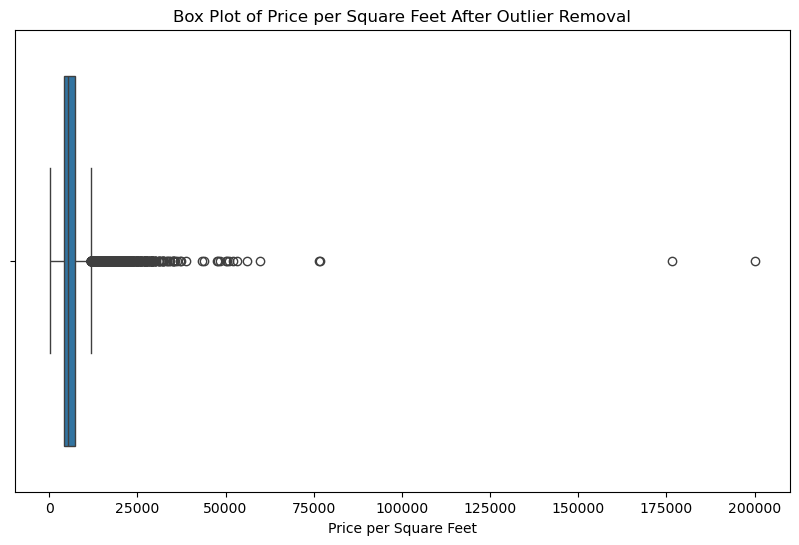

In [110]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_no_outliers['price_per_sqft'])
plt.title('Box Plot of Price per Square Feet After Outlier Removal')
plt.xlabel('Price per Square Feet')
plt.show()

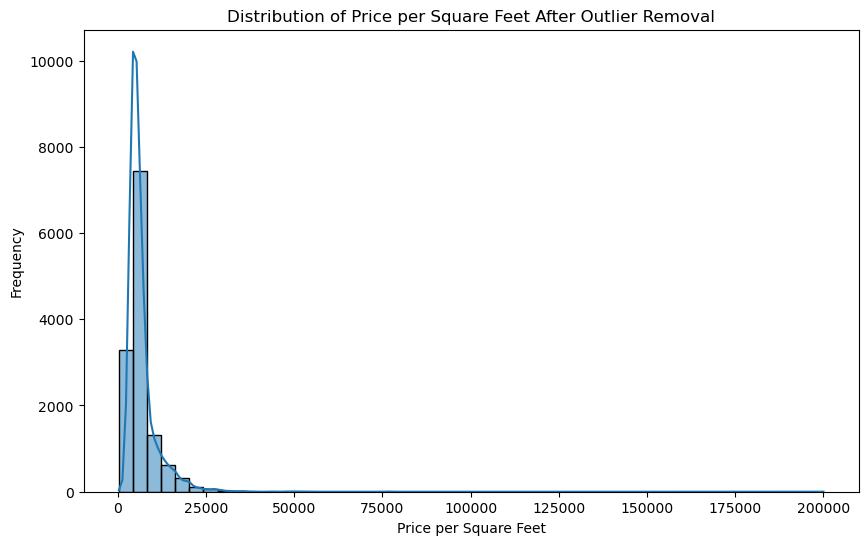

In [112]:

plt.figure(figsize=(10, 6))
sns.histplot(df_no_outliers['price_per_sqft'], bins=50, kde=True)
plt.title('Distribution of Price per Square Feet After Outlier Removal')
plt.xlabel('Price per Square Feet')
plt.ylabel('Frequency')
plt.show()

In [114]:
from scipy.stats import skew, kurtosis

skewness = skew(df_no_outliers['price_per_sqft'])
kurt = kurtosis(df_no_outliers['price_per_sqft'])

print(f'Skewness: {skewness}')
print(f'Kurtosis: {kurt}')

Skewness: 10.476617414984743
Kurtosis: 313.5273648918721


C:\Users\uw\AppData\Local\Temp\ipykernel_9120\1239434347.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['log_price_per_sqft'] = np.log(df_no_outliers['price_per_sqft'])


Text(0.5, 1.0, 'Distribution')

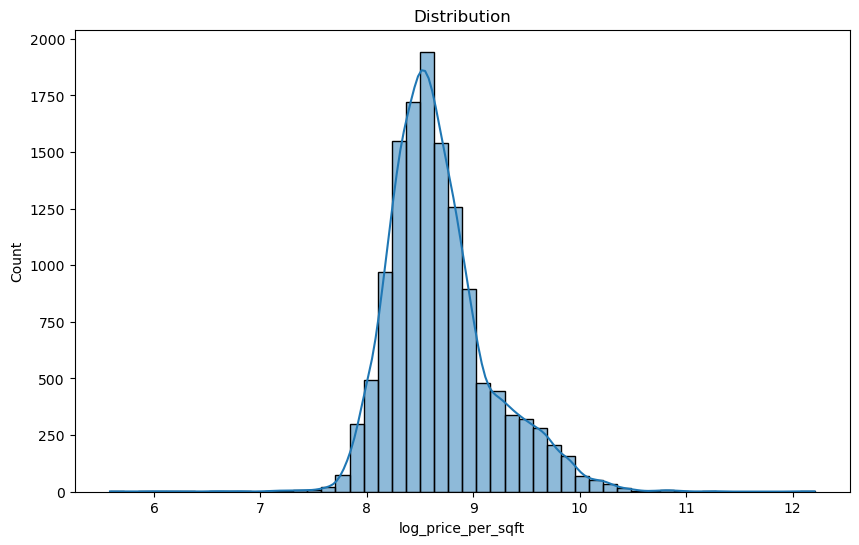

In [118]:
import numpy as np


df_no_outliers['log_price_per_sqft'] = np.log(df_no_outliers['price_per_sqft'])


plt.figure(figsize=(10, 6))
sns.histplot(df_no_outliers['log_price_per_sqft'], bins=50, kde=True)
plt.title('Distribution')